# CS 237 Spring 2020  Homework Six 

### Due date: Due Friday March 6th @ midnight in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 10 are analytical problems about last
week's material, and the remaining 2 problems are coding problems which will be discussed in lab. 


In [1]:
# Here are some imports which will be used in code that we write for CS 237
 
# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi,log,floor       # import whatever you want from math
from random import seed, random
from collections import Counter

%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Experimental Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_of_random_variable(Rx, Px, title='Probability Mass Function', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,Px,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_of_random_variable([1,2,3,4], [0.25,0.35,0.15,0.25])

#p = 0.14159234368

#                                                                                        ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                                 vvvvvvvvvvvvvvvv

#draw_distribution_of_random_variable( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
 


## Analytical Problem Instructions



A nice way to approach these is to do any complicated calculations in Python and then if you have
to change something you won't have to redo all the calculations. Plus, you will make fewer
mistakes in calculation. However, there is no need to do this for simpler problems. 

I also **strongly** recommend creating new variables for each problem, for example Rx1, Rx2, etc. for
the range of the random variable in problems 1, 2, etc.   That way, you won't have problems if you
forget and use the wrong variable! You can also refer to previous results without problems. 

### Please read:

**Starting with this homework, if you do not format your solutions so that they are legible and easy to grade, we will deduct points for sloppiness. I strongly recommend that you use the following formatting to specify your answer to numeric problems:**

    Solution to (A):  $\boxed{3.1415}.$

Solution to (A):  $\boxed{3.1415}.$

##  Problem One

A sack contains five balls, two of which are marked $\$1$,   two $\$2$, and one $\$10$. One round of the game is played as follows: You pay me $\$5$ to select two balls at random (without replacement) from the urn, at which point I pay you the sum of the amounts marked on the two balls. Suppose we define the "net payout" as the amount you win minus the cost of each round. </p>

(A) *Describe* the random variable X = "the net payout one round." (As in HW 05.)

(B) Calculate $E(X)$, showing all work.  

(C) Is this a fair game? If not,  what should I charge for each round to make it a fair game?


A:

Rx = [-3, -2, -1, 6, 7]
Px = [2 8 2 4 4]


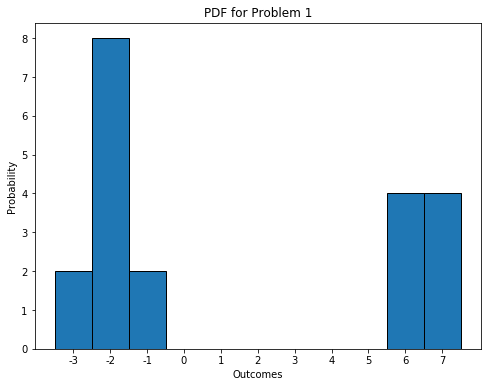

In [2]:
Rx0 = [-3,-2,-1,6,7]
Px0 = [2,8,2,4,4]

print("A:\n")
print("Rx =",Rx0)
print("Px =",np.around(Px0,4))             # in case you get complicated decimals, round to 4 places

draw_distribution_of_random_variable( Rx0, Px0, title='PDF for Problem 1')

#### B

$-3 \times \frac{2}{20} - 2 \times \frac{8}{20} - 1 \times \frac{2}{20} + 6 \times \frac{4}{20} + 7 \times \frac{4}{20} = 1.4$ ~ $\boxed{1.4}$

#### C 
Technically speaking it isn't a fair game as the Espected Value isn't 0, so in order to make sure that the value is 0 you should charge around $\boxed{6.4 USD}$

In [2]:
l = [2,3,4,11,12]
l2 = [0.1,0.4,0.1,0.2,0.2]

def calcValue(s,t,x):
    sum2 = 0
    
    for i in range(len(s)):
        sum2 += (s[i] - x)* t[i]
        
    return np.around(sum2,4)

calcValue(l,l2,6.4)

-0.0

## Problem Two 

In a lottery, a player pays $\$1$ and selects four different numbers from 0 to 9 (inclusive). Then,
from an urn containing 10  balls numbered from 0 to 9, four balls are
drawn at random and without replacement. 

If the numbers on exactly 3 of the balls match numbers that the player chose, he
wins $\$5$, and if the numbers on all 4 of the balls match numbers that the player chose, he wins $\$10$. If fewer than 3 numbers match, he gets nothing.   

Find the expected net payout (winnings - cost of ticket). 

In [3]:
def expectedValue(s,t):
    sum2 = 0
    
    for i in range(len(s)):
        sum2 += s[i] * t[i]
        
    return np.around(sum2,4)

NetGains = [-1,4,9]
Probability = [37/42, 4/35, 1/210]
EP = expectedValue(NetGains, Probability)

print("Net Gains Possibilites =", NetGains)
print("Probability =", np.around(Probability,4))
print("Expected Payout =", np.around(EP,4))

Net Gains Possibilites = [-1, 4, 9]
Probability = [0.881  0.1143 0.0048]
Expected Payout = -0.381


## Problem Three

Wayne and Zichen are throwing darts at a target, and Wayne's probability of hitting the bullseye is $p$ and Zichen's probability of hitting it is $q$ (independently of Wayne). A <i> round </i> of the game is for Zichen to throw and then Wayne to throw. The game is to keep throwing until <b>both</b> of them hit the bulleye <b>on the same round</b> and then stop. 

(A) If $X$ = the number of rounds until the game stops, what is the distribution of $X$?

(B) What is the probability that the game stops on the $k^{th}$ round?

(C) What is the probability that Zichen first hits the target in the 4th round, but Wayne has not yet hit the target?

(D) Suppose after 10 rounds (and no round where both have hit the target) they decide to change the rules and continue to play until at least one of them hits the target. How many more rounds would they expect to play on average?

You must express your answers in terms of the parameters $p$ and $q$ (and $k$ for (B)). 

#### A
The distribution would be a geometric distribution

#### B
$P(k) = ((1-p)^{k-1} \times p) \times ((1-q)^{k-1} \times q)$

#### C
$((1-p)^{3} \times p) \times ((1-q)^{4} \times q)$

#### D
$1 = ((1-p)^{k-1} \times p) + ((1-q)^{k-1} \times q)$ Where k represents the rounds.

## Problem Four

Wayne frequents a coffee shop which gives each customer who buys a coffee a 
coupon labelled with one of the numbers 1, 2, 3, or 4; when a customer collects coupons with all four numbers, he or she
may trade them in for a free coffee. The coffee shop does not keep track
of which coupons are given to which customers, and so the shop effectively picks
a coupon with replacement from the set of 4 coupons. 
  

(A) Suppose Wayne has received two coupons with numbers 2 and 4; what is the probability that Wayne receives one of the remaining coupons (i.e., in the set $\{1, 3 \}$) 
on his next visit?

(B) Suppose Wayne has not yet received coupon $i\in\{1,2,3,4\}$. Let $X$ = "the number of visits until he receives coupon $i$."
What is the distribution of $X$?  What is $E(X)$?  Be precise and give all relevant parameters, plus
a short justification for your solution. 

(C) Suppose Wayne has all but one of the coupons (e.g., he has 2, 3, and 4, but is waiting for 1). Let $X$ = "the number of visits until he receives the last coupon."
What is the distribution of $X$?  Be precise and give all relevant parameters, plus
a short justification for your solution. 



(D) What is the probability that Wayne will be able to get the fourth coupon at or before his 10th visit?
Hint: Use the Inverse Method!

(E) What is the expected number of visits for Wayne to be able to get all four coupons? (Note: this will be a real number.)


#### A
$\boxed{0.5}$

#### B
It's a geometric distribution where the probability is of getting any specific number is 0.25, and since each event is independent, the probability he gets that specific number at the kth try is $P(k) = 0.75^{1-k} \times 0.25$ and the expected value for X is 4.

This comes as the distribution follows the track of a geometric distribution, since it's memoryless and the probability each time is the same.

#### C
Since the probability of each event is independent, and it doesn't really matter how many other coupons Wayne has, then the distribution is the same as the one above. This is one of the properties of a memoryless system.

#### E
Since the event of getting each coupon has an expected value of 2.5, then if we add the four events, we get that the expected value is 10.

## Problem Five

A box contains 20 fuses, of which exactly 5 are defective. 

(A) Suppose
you select 3 fuses randomly, without replacement.

Let $X$ = "the number of defective fuses among the 3 selected."

Give $E(X)$. Show all work for full credit. 

(B) Suppose you choose fuses from the box randomly, without replacement, and test them. 
What is the expected number of fuses you choose until you find a non-defective fuse?

#### A

In [4]:
Rx5 = [0,1,2,3]
Px5 = [91/228, 175/5168, 25/2584, 1/114]
EP5 = expectedValue(Rx5, Px5)

print("Possibilites =", Rx5)
print("Probabilities =", np.around(Px5,4))
print("Expected Value =", np.around(EP5,4))

Possibilites = [0, 1, 2, 3]
Probabilities = [0.3991 0.0339 0.0097 0.0088]
Expected Value = 0.0795


#### B
$P(X = 1) = \frac{15}{20} = 0.75$

$P(x = 2) = \frac{5}{20} \times \frac{15}{19} = 0.1973$

$P(X = 3) = \frac{5}{20} \times \frac{4}{19} \times \frac{15}{18} = 0.0438$

$P(X = 4) = \frac{5}{20} \times \frac{4}{19} \times \frac{3}{18} \times \frac{15}{17} = 0.00774$

$P(X = 5) = \frac{5}{20} \times \frac{4}{19} \times \frac{3}{18} \times \frac{2}{17} \times \frac{15}{16} = 0.000967$

$P(X = 6) = \frac{5}{20} \times \frac{4}{19} \times \frac{3}{18} \times \frac{2}{17} \times \frac{1}{16} = 0.000064$

So, the expected value is: $1.3121$

## Problem Six

Consider an Ethernet with N nodes. During lull periods of time, no nodes are broadcasting a message; during such lull periods, a particular node will send a message with probabiliy $p$, independently of the other nodes. However, if 2 or more nodes send a message simultaneously, we have a collision and the messages are corrupted and transmission stops. A node whose message has been cancelled in this way will try again until the message is successfully transmitted. 

How many **times** on average will a given node attempt to transmit a message until it is successfully transmitted? 

But there is a subtlety here: Does "times" in the question mean 

<blockquote>
(i) "how many lull periods" (in which case you have to take account of the probability that the particular node attempted to send a message) or 

(ii) "attempts" (in which case the particular node has already tried, and the probability is 1.0 that the attempt was made)?
</blockquote>

Either is reasonable, so we will solve for both. 

(A)  Use assumption (i) to solve the problem. 

(B) Use assumption (ii) to solve the problem. 

#### A
Using (i), a message will be transmitted if a single node sends a message and no others do the same, meaning we need N-1 failures and 1 success, so, the probability of a single lull period to succeed is $(1-p)^{N-1} \times p$, so the probability of it taking k periods is $P(k) = ((1-p)^{N})^{k-1} \times ((1-p)^{N-1} \times p)$

#### B
Using (ii), a message will be transmitted if a single node sends a message and no others do the same, meaning we need N-1 failures and 1 success, however, in this case we already know that that one node sent the message, so we only have to factor in the remaining nodes, which means the probability that a single attempt succeeds is $(1-p)^{N-1}$, meaning that the probability of taking k attempts is $P(k) = ((1-p)^{N})^{k-1} \times (1-p)^{N-1}$

## Problem Seven

Wayne rolls a fair die until he gets a 2. Trevor rolls the same die until he gets an odd number. What is the probability that Trevor rolls the die more times than Wayne does?

Hint: Find the probability that Wayne rolls $k$ times and Trevor rolls more than $k$ times (remembering that these are independent), and then sum over all possible $k$. 

The probability of landing a 2 is $\frac{1}{6}$, while the probability of rolling an odd number is $\frac{1}{2}$, so the probability of it taking k rolls for Wayne to get his two is $P(k) = \frac{5}{6}^{k-1} \times \frac{1}{6}$ and the probability of Trevor getting is odd number in j > e rolls is $P(X > k) = \frac{1}{2}^{k}$. 

So, the probability of these two events is $\boxed{\frac{5}{6}^{k-1} \times \frac{1}{6} \times \frac{1}{2}^{k}}$



## Problem Eight

Suppose you are playing a game with a friend in which you bet $n$ dollars on the flip of a fair coin: if the coin lands tails you lose your $n$ dollar bet, but if it lands heads, you get $2n$ dollars back (i.e., you get your $n$ dollars back plus you win $n$ dollars). 

Let $X$ = "the amount you gain or lose." 

(A) What is the expected return $E(X)$ on this game? Give your answer in terms of $n$ and show all work. 

Now, after losing a bunch of times, suppose you decide to improve your chances with the following strategy: you will start by betting $\$1$, and if you lose, you will double your bet the next time, and you will keep playing until you win (the coin has to land heads sometime!).

Let $Y$ = "the amount you gain or lose with this strategy". 

(B) What is the expected return $E(Y)$ with this strategy? (Hint: think about what happens for each of the cases of $k = 1, 2, 3, \ldots$ flips). 

(C) Hm ... do you see any problem with this strategy? How much money would you have to start with to guarantee that you always win?  

(D) Suppose when you apply this strategy, you start with $\$20$ and you quit the game when you run out of money. Now what is $E(Y)$?


#### A

In [5]:
Rx8 = [-1,1]
Px8 = [0.5, 0.5]
EP8 = expectedValue(Rx8, Px8)

print("Possibilites =", Rx8)
print("Probabilities =", np.around(Px8,4))
print("Expected Value =", np.around(EP8,4))

Possibilites = [-1, 1]
Probabilities = [0.5 0.5]
Expected Value = 0.0


#### B
Since the probability of eventually landing a heads is 1, then the expected return, if you bet infinitely as many times, the expected value is 0.

#### C
You would, in theory, need to have infinit money, as you would, theoretically, need to bet infinitely many times to win once.

#### D
Since this doesn't actually give us an actual value, because 20 is not a power of 2, then at MOST, you can play and lose 4 games, so, the variable is described as bellow:

In [6]:
Rxd8 = [-15,1]
Pxd8 = [0.5 ** 4, 0.9375]
EPd8 = expectedValue(Rxd8, Pxd8)

print("Possibilites =", Rxd8)
print("Probabilities =", np.around(Pxd8,4))
print("Expected Value =", np.around(EPd8,4))

Possibilites = [-15, 1]
Probabilities = [0.0625 0.9375]
Expected Value = 0.0


## Problem Nine

Suppose a kennel has N cages for N dogs, and each dog wears a collar with his/her name, and each cage also has a label with the name of the dog on it. 
The owner of the kennel takes all the dogs out for exercise, and then
randomly lets them enter the cages, one dog per cage (so he pays no attention to the names).  

Let $X$ = the number of dogs who end up in their own cages. 

Find $E(X)$ and show all work. 

Hint: Define N Bernoulli "indicator" random variables, $I_1,\ldots I_N$, where success for $I_k$ is  dog $k$ ending up in
its own cage, and use the linearity of expectation. 

The first dog as a $\frac{1}{N}$ chance of going into the right cage, the second one will have a $\frac{1}{N-1}$, hence on hence forward.

So, using the N Bernoulli "indicator" for random variables, $I_1,\ldots I_N$ where success for $I_k$ is dog $k$ ending up inits own cage, so the success for each dog is: is $\frac{1}{N-(1-k)}$ So, the $\boxed{E(X) = N \times \sum_{k}^{N} \frac{1}{N-(1-k)}}$.

## Problem Ten

Suppose you randomly shuffle a standard deck of 52 cards, and then
select cards without replacement until you get an Ace. 

Let $X$ = the number of cards you select (the last selection being the Ace).

Give $E(X)$ and show all work. 

Hint: To determine the PMF, let $P(X = k) = P(A\cap B)$ where $A$ is the event that no Ace appears among the first $k-1$ cards selected and $B$ be the event that the $k^{th}$ card selected is an Ace. You can easily calculate $P(A)$ and $P(B)$, but since these are **not** independent, so you can't just multiply; instead calculate and use $P(B|A)$ to determine $P(A\cap B)$.


Since the probability of getting an ace is $\frac{1}{13}$ then the distribution for X is ${1, ..., 48}$ and the probability of each of these is ${\frac{1}{52}, ...,1}$, if we plugged this into the expected value formula, we would get that it would take, on average, 13 tried to get an Ace. 

## Lab Problems -- Let's Gamble!

This lab follows up on Thursday's lecture, and considers various ways to
perform experiments with games, exploring the idea of expected value. 

There are only two problems this week for lab. 

## Problem 11: What is the best strategy for the game of Twenty-One?
Now suppose we want to actually figure out the right way to gamble, using random variables and distributions.  

We will play a version of blackjack called Twenty-One and figure out the best strategy for the game.

### Twenty One
This game is similar to the famous card game blackjack. We will play a one-player version of the game. The game is played for some number `num_trials` of rounds (we will use `num_trials` = $10^5$), at the end of which the player wins points. The player accumulates points during the whole game, and the objective is, of course, to end up with the maximum number of points. 

The objective in each round of the game is to score as close to 21 as possible by rolling a die as many times as you wish and adding all the numbers that appear. When a player's total exceeds 21, he is 'busted' and gets 0 points. If the player chooses to stop rolling before he exceeds 21, then he wins whatever his total is at that point. So for example, if a player rolls 5, 2, 4, and then 6, his total at that point is 17, and he has to decide whether it is worth trying again: he will be busted if he gets 5 or more (since 17+5=22), but will get a better total if he gets 4 or less.  

There are many variations on this game, some involving multiple players, or a "banker" or different numbers of dice, or alcohol..... <a href="https://www.youtube.com/watch?v=G_IHHNjdIEk">here</a> is a short YT video explaining the basic game.

A computer can play this game with a suitable strategy. For this problem, we will consider a strategy to be simply an integer K which is the value at which you stop rolling (thinking that you are close enough to 21). The number K is fixed for the entire game. For example, if you set K = 19, then in every round, you will keep rolling if your sum to that point is less than 19; if you get a num &ge; 19 you stop. Clearly, any good strategy will be a number at least 15, since 15+6=21 and if you roll again at 15, you will never bust. But we will try all possible strategies. 

### To Do
You should write a function <code>playRound(K)</code> which rolls a single die until you reach or exceed K or get busted, and either return your score (if you reached or exceeded K), or 0 (if you were busted). Then write a function <code>playGame()</code> which calls <code>playRound(K)</code> for N = 10,000 times for each K and returns an array of 21 numbers giving the average payoff for each K = 1, ..., 21.

Your task is to answer the following questions: 

(A) For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?

(B) What is the best strategy for the game, meaning what value of K wins the most points on average?

Print out the values and an appropriate bar chart for the first question, and simply print out the answer to the second question using a print(...) function. You must calculate the answer in Python, not by observation of the graph. 

[4, 4, 3, 6, 5, 7, 8, 12, 9, 11, 14, 12, 18, 16, 15, 19, 21, 19, 20, 21, 0]


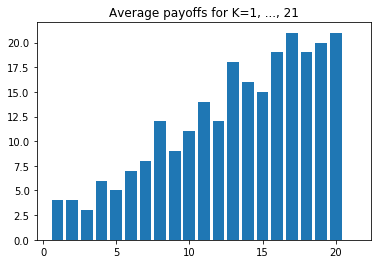


Best score is obtained for K = 17


In [20]:
#Plays a single round of Twenty One with strategy K (flips the die until K is
#reached or the player busts) and returns the score.

def rollDie():
    return np.random.randint(1,7)

def playRound(K):
    sum1 = 0
    while (sum1 < K):
        sum1 += rollDie()
        
    if sum1 > 21:
        sum1 = 0

    return sum1         # your code here

#Calculate the average payoff for each possible strategy K = 1, 2, ..., 21
#by playing the game num_trials times for each K and keeping track of the payoff.

num_trials = 10**5
X = [ k for k in range(1,22) ]                  # your code here
Y = [ playRound(k) for k in range(1,22) ]
print(Y)
plt.title("Average payoffs for K=1, ..., 21")
plt.bar(X,Y)
plt.show()

yMax = max(Y)
indexMax = Y.index(yMax)
best = X[indexMax]


print("\nBest score is obtained for K = " + str(best))     

## Problem 12:  The Two-Armed Bandit

This game, named from a nickname for slot machines (which have
two levers to pull and steal your money!), is played by a single player who has two coins:

> $A$ with a probability of heads $p_A$, and   
> $B$ with a probability of head $p_B$,
  
The coins are indistinguishable: the player does not know which coin is $A$ and which is $B$, nor the probabilities involved (of course, the game is not as interesting if the probabilities are equal!).

One round of the game is played as follows: the player chooses one of the coins
and flips it. If the result is heads, the player wins $\$1$; if tails the player 
loses $\$1$ (which can be thought of as a net profit of $-\$1$). The game is played for
some large number of rounds $n$ (though this is not important, and you might as well think of the game as continuing infinitely).

The question is one of strategy: how do you maximize your profit?

It might seem as there is no "strategy" for this game, and the player might
simply use the "random strategy":

> RS:  In each round, flip a third, fair coin to choose either A or B.

 However, a strategy of "win stay, lose shift" has been proposed to
optimize one's chances of success.  This strategy is simple: 

>  WSLS:  In the first round, use coin A. After that, if you win, 
>  then flip the same coin again; if you lose, switch to the other coin. 

This strategy has an intuitive appeal, because you would think that over a large
number of rounds, the coin with the higher probability would tend to be flipped
more often, resulting in more profit. 

However, no one has (yet) come up with a rigorous proof that this strategy is
better than the random strategy. Hence we must fall back on experiments. 
In this problem we will investigate these
two strategies and see if indeed the "win stay, lose shift" strategy is better
than the random strategy. 

First, complete the template below to implement the basic framework for the game, then try the following experiments. Code to print out the results has been included,
you must provide the code to implement each strategy. 

(A)  Set pa = pb = 0.6.  In this case, both strategies should be equivalent. Run 
the game for $10^5$ rounds ($10^6$ if you can) and print out the results, they
should be very close.

(B)  Set pa = 0.6 and pb = 0.5 and run for $10^5$ rounds ($10^6$ if you can). You should
see modest improvement using WSLS.

(C)  Set pa = 0.75 and pb = 0.25 and run for $10^5$ rounds ($10^6$ if you can). You should see a fairly dramatic improvement using WSLS. 

Try this without the seed (commenting out the line `np.random.seed(0)`, in which case you will see the general trend of
these experiments, and then include the seed before you submit.  The comments below
on what results you should see assume you have used the seed. 


In [29]:
# Problem 12

# this is like a Bernoulli, except it returns 1 (for success = heads) or -1 (failure, tails)
def flip_coin(p):
    if (np.random.random() < p):
        return 1
    else:
        return -1

num_trials = 10**6

def random_strategy(pa,pb):
    sum1 = 0
    for i in range(num_trials):
        if (flip_coin(0.5) == 1):
            sum1 += flip_coin(pa)
        else:
            sum1 += flip_coin(pb)
    
    return sum1
    

def win_stay_lose_shift(pa,pb):
    previousCoin = pa
    otherCoin = pb
    previousToss = flip_coin(previousCoin)
    sum1 = previousToss
    for i in range(num_trials-1):
        if (previousToss == 1):
            previousToss = flip_coin(previousCoin) 
            sum1 += previousToss
        else:
            temp = previousCoin
            previousCoin = otherCoin
            otherCoin = temp
            
            previousToss = flip_coin(previousCoin) 
            sum1 += previousToss
            
    
    return sum1

np.random.seed(0)

# Calculate average profit of WSLS over Random per round
print("(A)\n")
pa = 0.6
pb = 0.6
rs = random_strategy(pa,pb)
wsls = win_stay_lose_shift(pa,pb)
print(rs)
print(wsls)
print((wsls-rs)/num_trials)    # average payoff per round -- should be very small
print()

print("(B)\n")
pa = 0.6
pb = 0.5
rs = random_strategy(pa,pb)
wsls = win_stay_lose_shift(pa,pb)
print(rs)
print(wsls)
print((wsls-rs)/num_trials)    # average payoff per round -- should be around 0.007 to 0.009
print()

print("(C)\n")
pa = 0.75
pb = 0.25
rs = random_strategy(pa,pb)
wsls = win_stay_lose_shift(pa,pb)
print(rs)
print(wsls)
print((wsls-rs)/num_trials)    # average payoff per round -- should be around 0.24 to 0.25
print()

(A)

198862
200612
0.00175

(B)

99844
111404
0.01156

(C)

256
250476
0.25022

